<a href="https://colab.research.google.com/github/tuilatoan15/6351071071_Lab2/blob/main/6351071071_LAB2_Bai2(Trang15_16)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Câu 1

In [15]:
import pandas as pd

train = pd.read_csv("adult.data.csv", header=None, skipinitialspace=True)
test  = pd.read_csv("adult.test.csv", header=None, skiprows=1, skipinitialspace=True)

print("Nguyễn Hữu Toàn – 6351071071")
print("Number of training data:", len(train))
print("Number of test data:", len(test))

Nguyễn Hữu Toàn – 6351071071
Number of training data: 32562
Number of test data: 16281


#Câu 2

In [16]:
import pandas as pd
import numpy as np

train = pd.read_csv("adult.data.csv", header=None, skipinitialspace=True)
test  = pd.read_csv("adult.test.csv", header=None, skiprows=1, skipinitialspace=True)

train_columns = ["age","workclass","fnlwgt","education","education-num","marital-status",
                 "occupation","relationship","race","sex","capital-gain","capital-loss",
                 "hours-per-week","native-country","income"]
test_columns  = ["age","workclass","education","education-num","marital-status",
                 "occupation","relationship","race","sex","capital-gain","capital-loss",
                 "hours-per-week","native-country","income"]

train.columns = train_columns
test.columns  = test_columns

test["income"] = test["income"].astype(str)
test["income"] = test["income"].str.replace(".", "", regex=False)

train = train.replace("?", np.nan).dropna()
test  = test.replace("?", np.nan).dropna()

train = train.drop(columns=["fnlwgt"])

data = pd.concat([train, test], ignore_index=True)

print("Nguyễn Hữu Toàn – 6351071071")
print(data.info())


Nguyễn Hữu Toàn – 6351071071
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45223 entries, 0 to 45222
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45223 non-null  object
 1   workclass       45223 non-null  object
 2   education       45223 non-null  object
 3   education-num   45223 non-null  object
 4   marital-status  45223 non-null  object
 5   occupation      45223 non-null  object
 6   relationship    45223 non-null  object
 7   race            45223 non-null  object
 8   sex             45223 non-null  object
 9   capital-gain    45223 non-null  object
 10  capital-loss    45223 non-null  object
 11  hours-per-week  45223 non-null  object
 12  native-country  45223 non-null  object
 13  income          45223 non-null  object
dtypes: object(14)
memory usage: 4.8+ MB
None


#Câu 3

Nguyễn Hữu Toàn – 6351071071


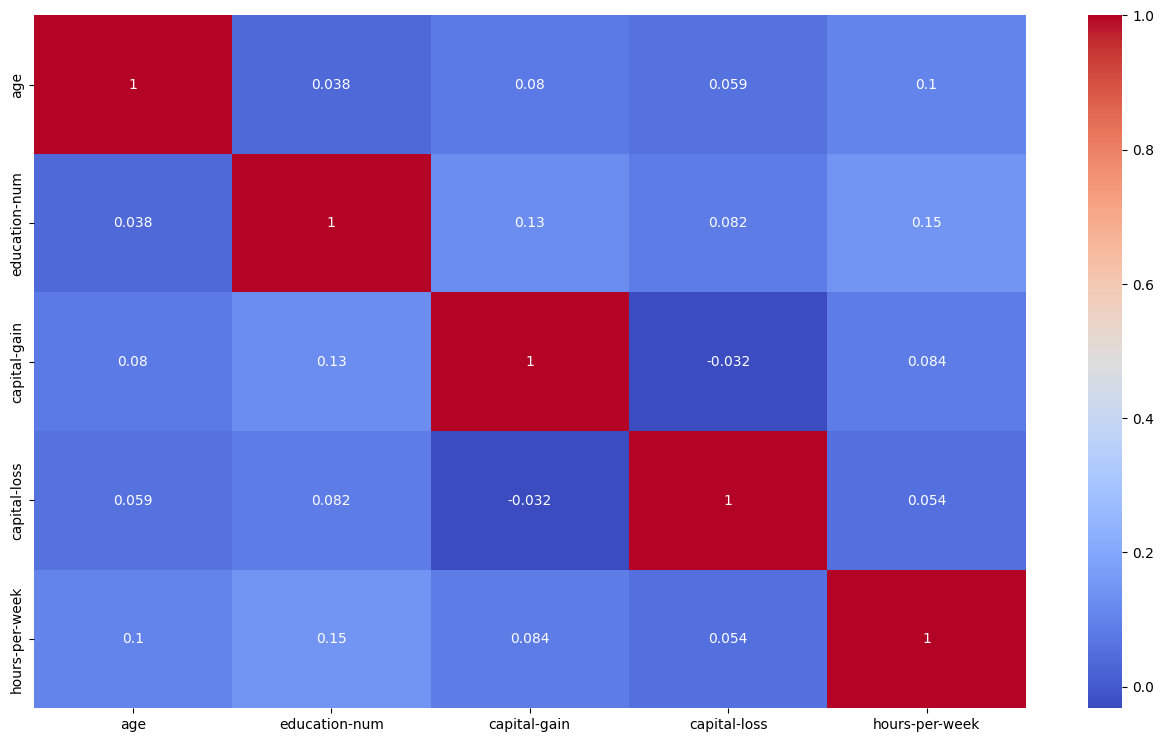

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['age','education-num','capital-gain','capital-loss','hours-per-week']
numeric_data = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(16,9))
sns.heatmap(numeric_data.corr(method='pearson'), annot=True, cmap='coolwarm')

print("Nguyễn Hữu Toàn – 6351071071")


#Câu 4

In [22]:
features = data.drop('income', axis=1)
labels = data['income']

print("Nguyễn Hữu Toàn – 6351071071")
print("Features shape:", features.shape)
print("Labels shape  :", labels.shape)

Nguyễn Hữu Toàn – 6351071071
Features shape: (45223, 13)
Labels shape  : (45223,)


#Câu 5

In [27]:
categorical_cols = features.select_dtypes(exclude=['int64']).columns
features_onehot = pd.get_dummies(features, columns=categorical_cols)

print("Nguyễn Hữu Toàn – 6351071071")
print("Shape của features sau khi one-hot:", features_onehot.shape)
features_onehot.head()

Nguyễn Hữu Toàn – 6351071071
Shape của features sau khi one-hot: (45223, 868)


age_17  age_18  age_19  age_20  age_21  age_22  age_23  age_24  age_25  \
0   False   False   False   False   False   False   False   False   False   
1   False   False   False   False   False   False   False   False   False   
2   False   False   False   False   False   False   False   False   False   
3   False   False   False   False   False   False   False   False   False   
4   False   False   False   False   False   False   False   False   False   

   age_26  ...  native-country_Puerto-Rico  native-country_Scotland  \
0   False  ...                       False                    False   
1   False  ...                       False                    False   
2   False  ...                       False                    False   
3   False  ...                       False                    False   
4   False  ...                       False                    False   

   native-country_South  native-country_Taiwan  native-country_Thailand  \
0                 False                  False                    False   
1                 False                  False                    False   
2                 False                  False                    False   
3                 False                  False                    False   
4                 False                  False                    False   

   native-country_Trinadad&Tobago  native-country_United-States  \
0                           False                         False   
1                           False                          True   
2                           False                          True   
3                           False                          True   
4                           False                          True   

   native-country_Vietnam  native-country_Yugoslavia  \
0                   False                      False   
1                   False                      False   
2                   False                      False   
3                   False                      False   
4                   False                      False   

   native-country_native-country  
0                           True  
1                          False  
2                          False  
3                          False  
4                          False  

[5 rows x 868 columns]

#Câu 6

In [28]:
X_train = features_onehot[:30162]
X_test = features_onehot[30162:]

y_train = labels[:30162]
y_test = labels[30162:]

print("Nguyễn Hữu Toàn – 6351071071")
print("Kích thước dữ liệu huấn luyện X_train:", X_train.shape)
print("Kích thước dữ liệu kiểm thử X_test:", X_test.shape)
print("Kích thước nhãn y_train:", y_train.shape)
print("Kích thước nhãn y_test:", y_test.shape)

Nguyễn Hữu Toàn – 6351071071
Kích thước dữ liệu huấn luyện X_train: (30162, 868)
Kích thước dữ liệu kiểm thử X_test: (15061, 868)
Kích thước nhãn y_train: (30162,)
Kích thước nhãn y_test: (15061,)


#Câu 7

Nguyễn Hữu Toàn – 6351071071
Accuracy: 0.7541995883407476
Report:
               precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86     11360
        >50K       0.33      0.00      0.00      3701

    accuracy                           0.75     15061
   macro avg       0.54      0.50      0.43     15061
weighted avg       0.65      0.75      0.65     15061



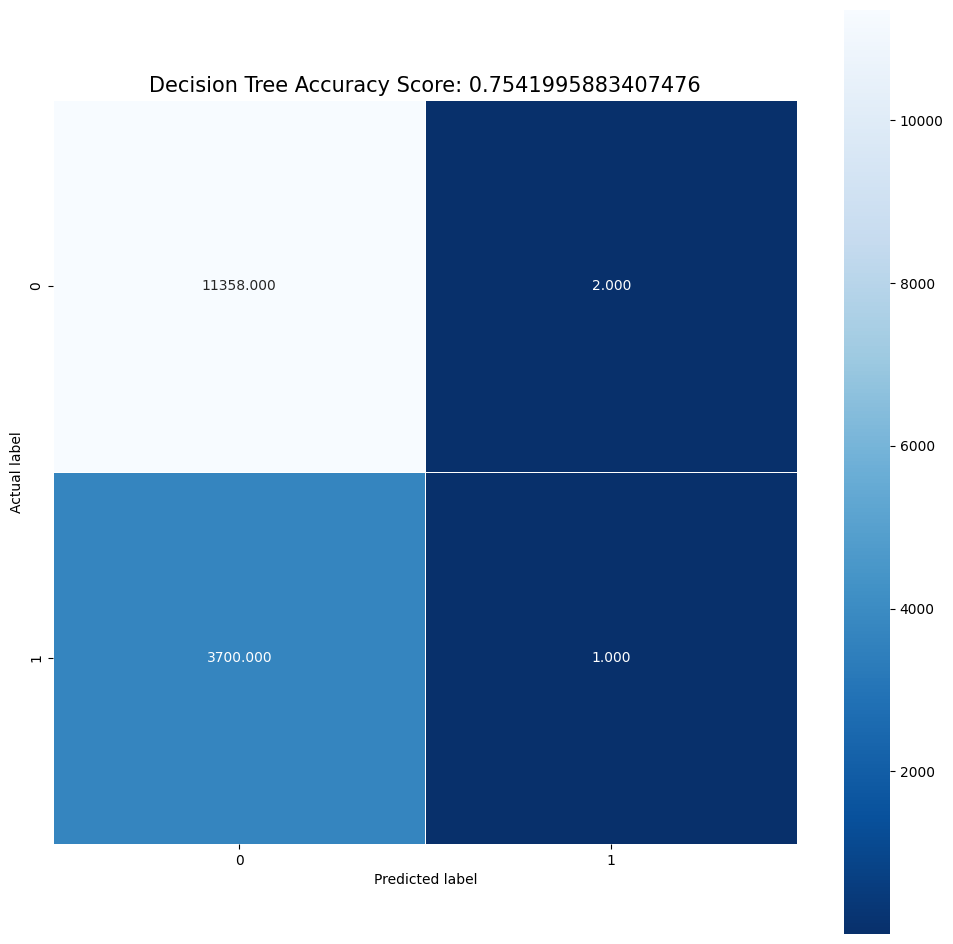

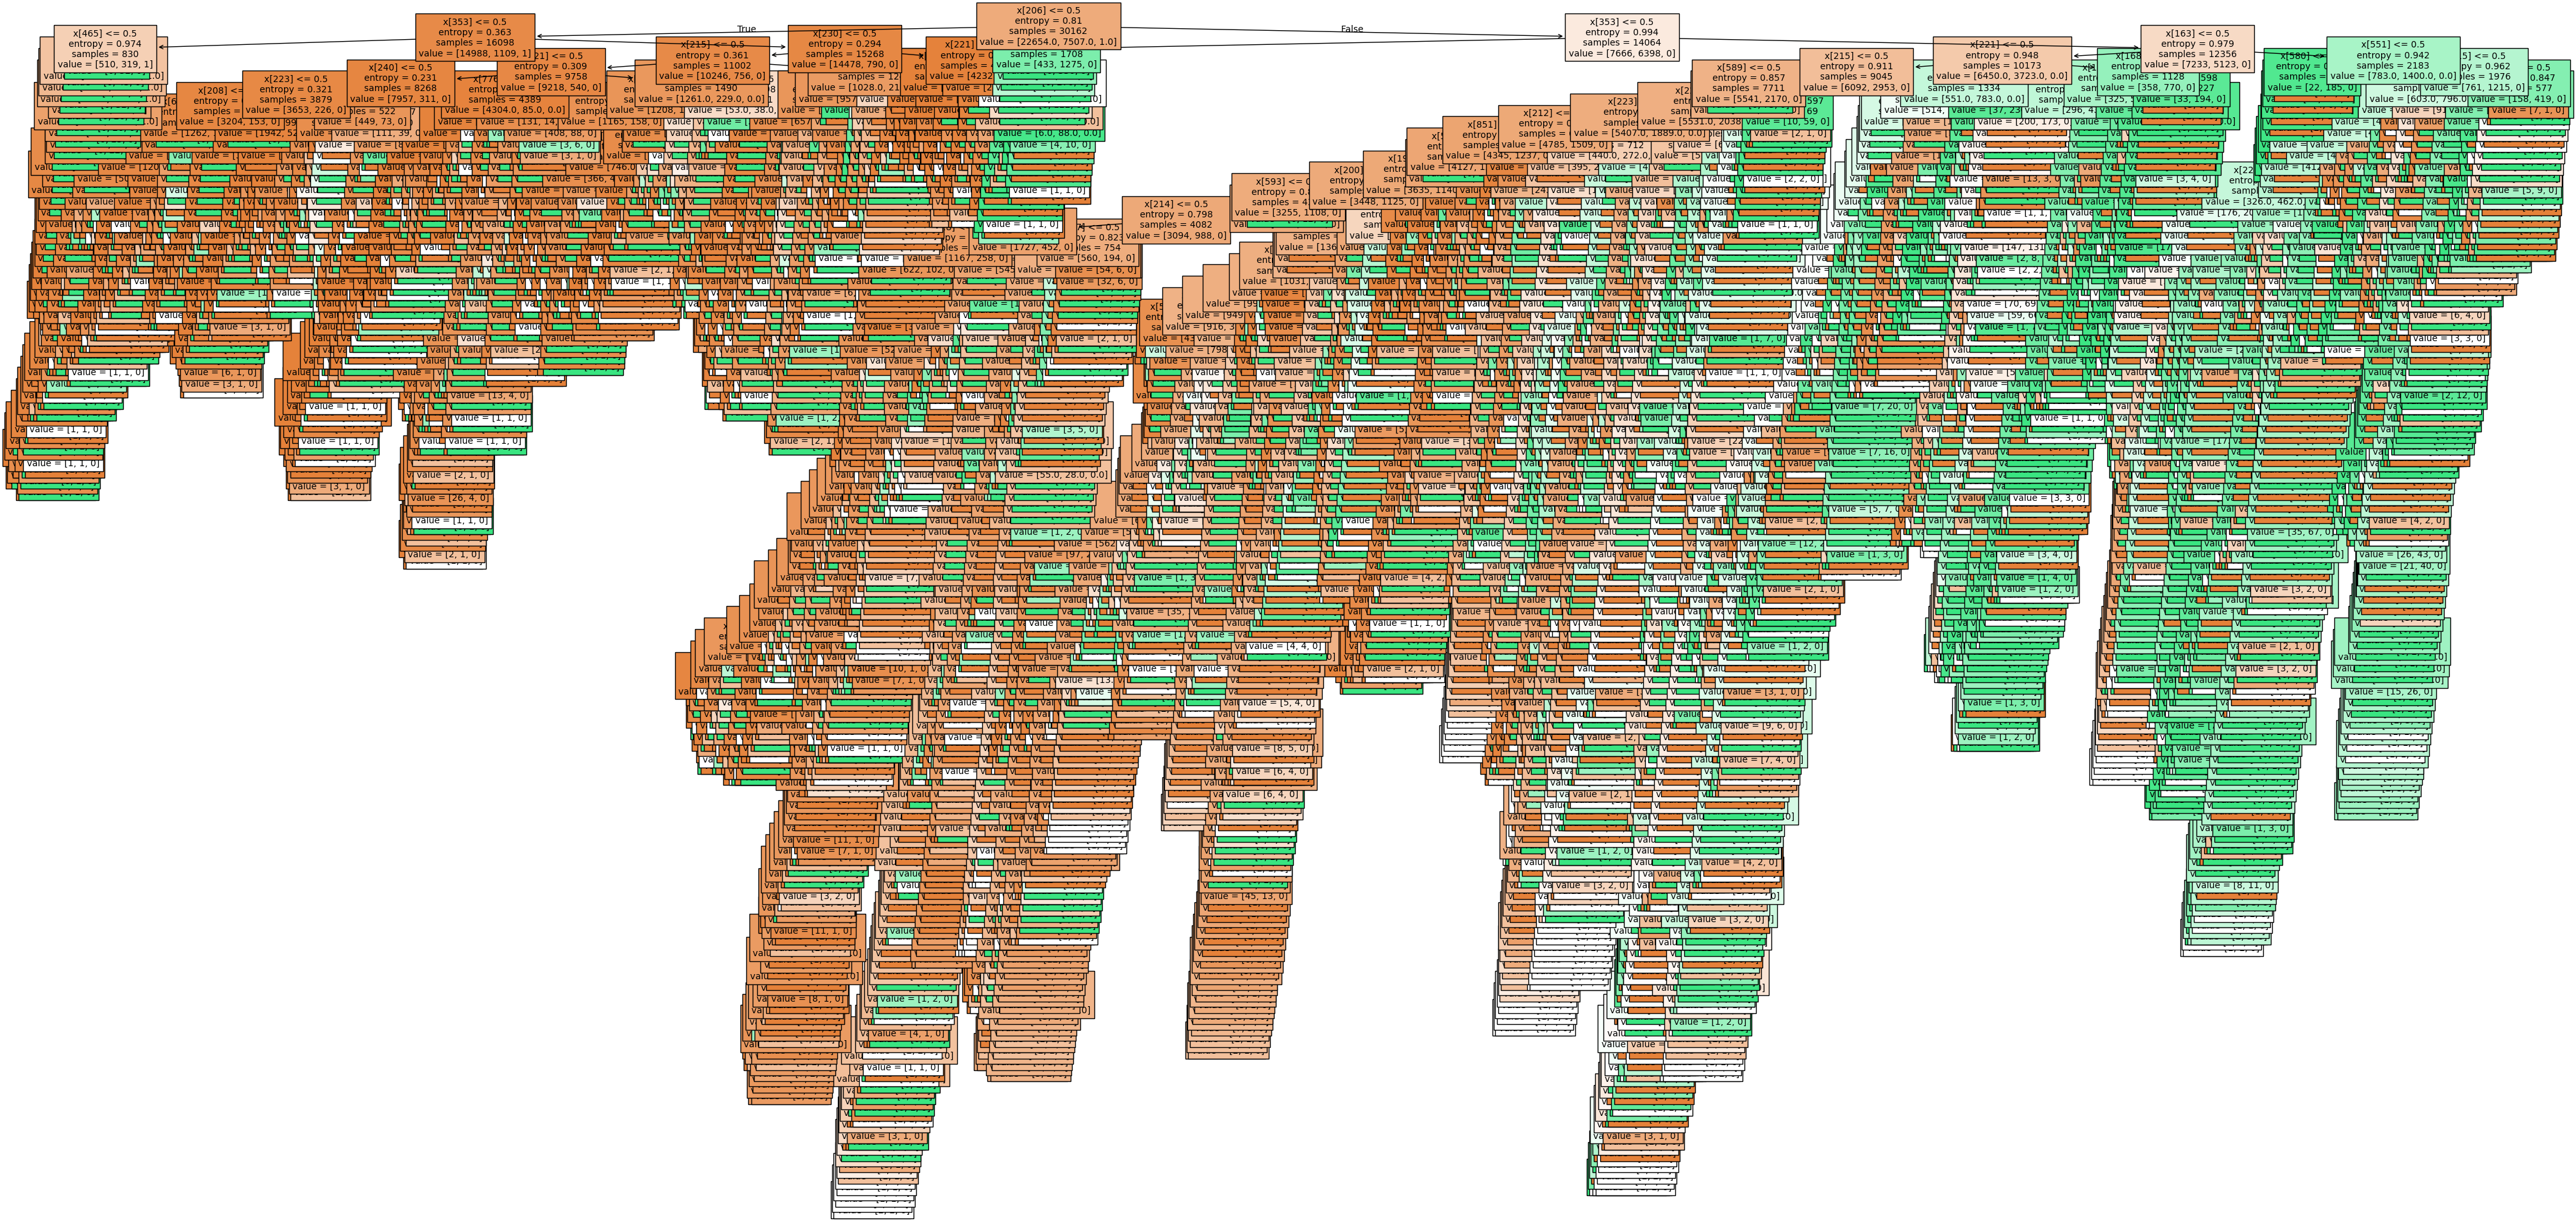

In [29]:
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Xây dựng cây ID3 với criterion='entropy' (Information Gain)
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
tree_pred = clf.predict(X_test)

# Độ chính xác mô hình
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Nguyễn Hữu Toàn – 6351071071")
print("Accuracy:", tree_score)

# Báo cáo chi tiết
print("Report:\n", metrics.classification_report(y_test, tree_pred))

# Ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Decision Tree Accuracy Score: {0}'.format(tree_score), size=15)
plt.show()

# Biểu diễn cây quyết định
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree.png', dpi=100)
plt.show()

#Câu 8

Nguyễn Hữu Toàn – 6351071071
CART Accuracy: 0.7108425735342939
Report:
               precision    recall  f1-score   support

       <=50K       0.93      0.66      0.78     11360
        >50K       0.45      0.85      0.59      3701

    accuracy                           0.71     15061
   macro avg       0.69      0.76      0.68     15061
weighted avg       0.82      0.71      0.73     15061



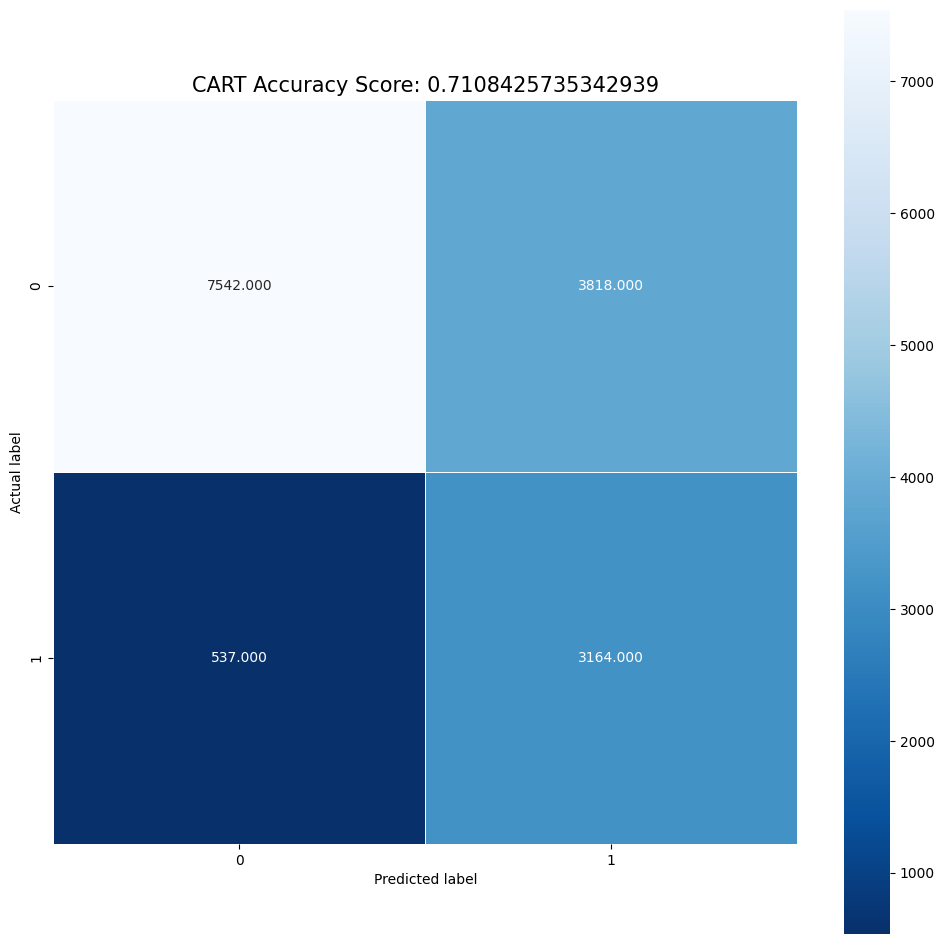

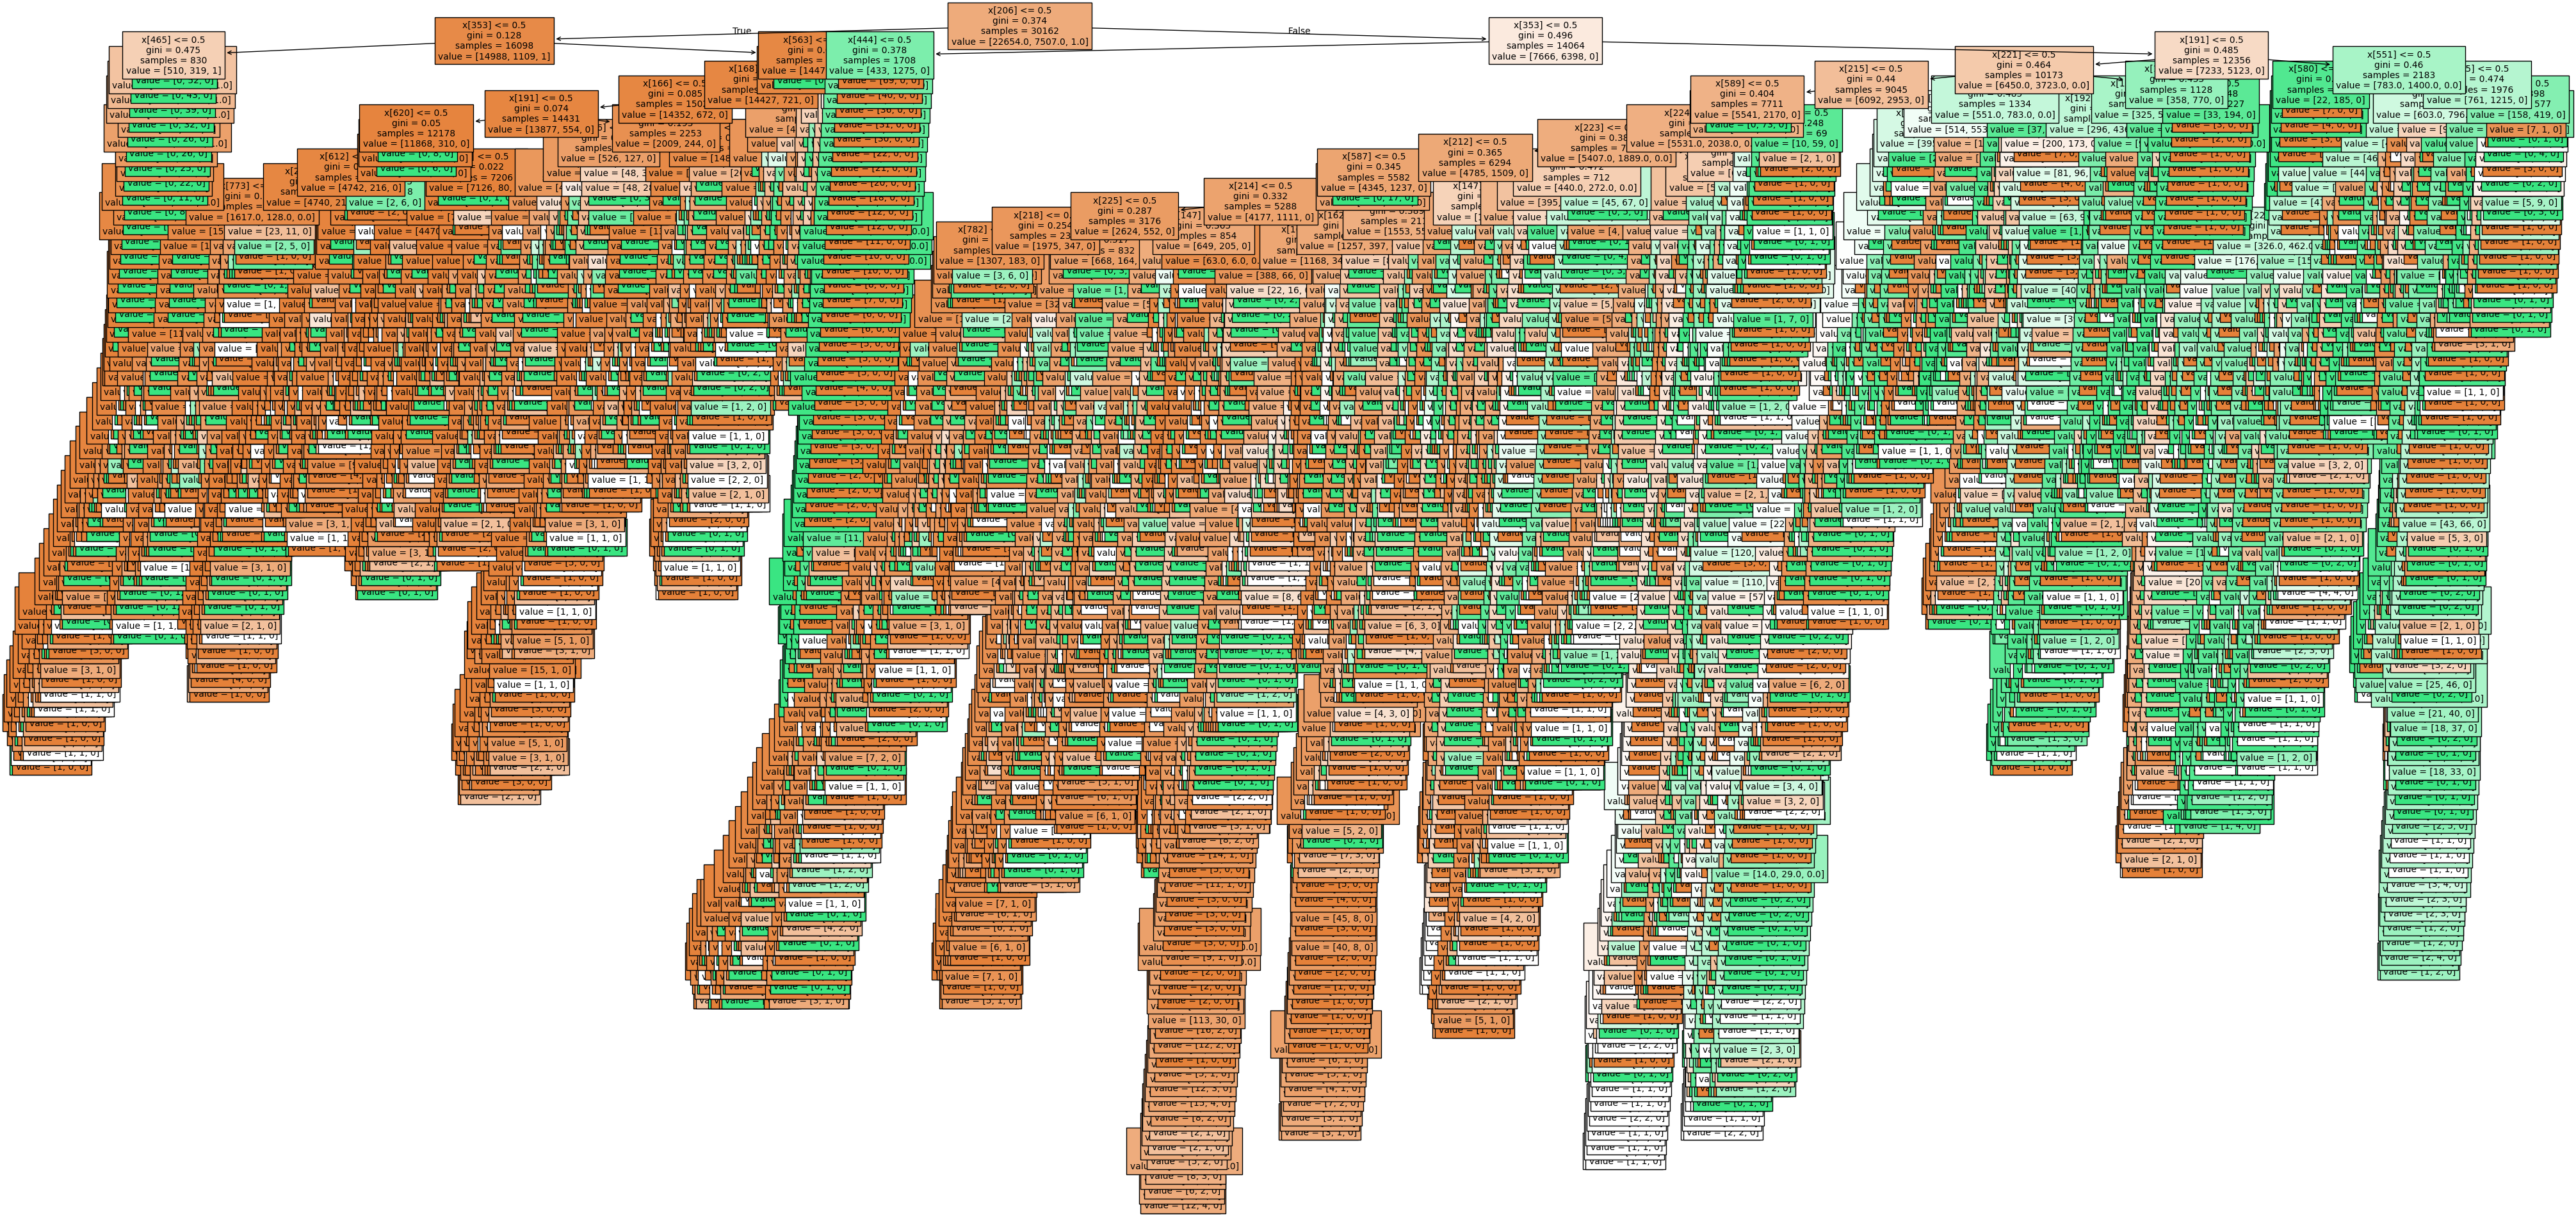

In [30]:
# Xây dựng cây CART với criterion='gini'
clf_cart = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf_cart.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
cart_pred = clf_cart.predict(X_test)

# Độ chính xác mô hình
cart_score = metrics.accuracy_score(y_test, cart_pred)
print("Nguyễn Hữu Toàn – 6351071071")
print("CART Accuracy:", cart_score)

# Báo cáo chi tiết
print("Report:\n", metrics.classification_report(y_test, cart_pred))

# Ma trận nhầm lẫn
cart_cm = metrics.confusion_matrix(y_test, cart_pred)
plt.figure(figsize=(12,12))
sns.heatmap(cart_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('CART Accuracy Score: {0}'.format(cart_score), size=15)
plt.show()

# Biểu diễn cây CART
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf_cart, filled=True, fontsize=10)
plt.savefig('cart_tree.png', dpi=100)
plt.show()

#Câu 9

Nguyễn Hữu Toàn – 6351071071
Naive Bayes Accuracy: 0.2606732620675918
Report:
               precision    recall  f1-score   support

       <=50K       0.93      0.02      0.04     11360
        >50K       0.25      0.99      0.40      3701

    accuracy                           0.26     15061
   macro avg       0.59      0.51      0.22     15061
weighted avg       0.76      0.26      0.13     15061



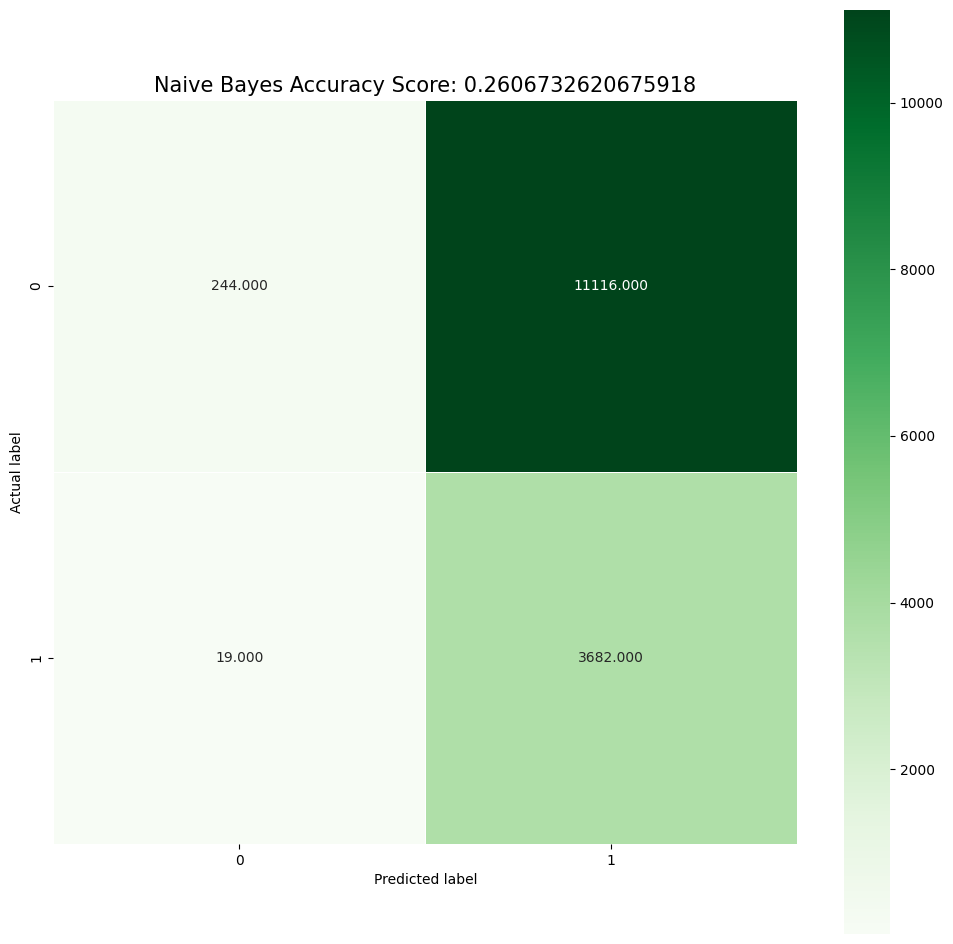

In [31]:
# Xây dựng mô hình Naïve Bayes
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

# Độ chính xác mô hình
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Nguyễn Hữu Toàn – 6351071071")
print("Naive Bayes Accuracy:", bayes_score)

# Báo cáo chi tiết
print("Report:\n", metrics.classification_report(y_test, bayes_pred))

# Ma trận nhầm lẫn
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Naive Bayes Accuracy Score: {0}'.format(bayes_score), size=15)
plt.show()


#Câu 10

#Nguyễn Hữu Toàn – 6351071071

Độ chính xác tổng thể:
Mô hình ID3 Decision Tree đạt accuracy khoảng 0.754, cao nhất trong ba mô hình. CART Decision Tree có accuracy khoảng 0.711, vẫn ở mức chấp nhận được. Naive Bayes có accuracy thấp nhất, chỉ khoảng 0.261, cho thấy hiệu quả kém trên tập dữ liệu này.

Nhận xét về dự đoán theo lớp:
Mô hình ID3 dự đoán chính xác phần lớn các mẫu thuộc lớp <=50K, recall của lớp >50K bằng 0, cho thấy mô hình thiên lệch về lớp phổ biến. CART dự đoán cân bằng hơn giữa hai lớp, recall của lớp >50K lên tới 0.85, trong khi lớp <=50K vẫn được dự đoán tương đối chính xác. Naive Bayes dự đoán phần lớn cho lớp >50K, dẫn đến accuracy và các metric khác rất thấp. Nguyên nhân chính là dữ liệu có mối quan hệ giữa các thuộc tính, không thỏa giả thiết độc lập của Naive Bayes.

Kết luận chung:
ID3 phù hợp khi mục tiêu là đạt accuracy cao cho lớp phổ biến nhưng không phù hợp nếu cần dự đoán chính xác lớp ít xuất hiện. CART cân bằng hơn và dự đoán tốt cho cả hai lớp, phù hợp với dữ liệu không cân bằng. Naive Bayes không hiệu quả trong trường hợp này do giả thiết độc lập giữa các thuộc tính không phù hợp với dữ liệu thực tế.